## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, ShuffleSplit
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

%matplotlib inline

## Load the Data

In the cells below, we load the data, drop the irrelevant columns, and split the data into train and test datasets. The models we formulate will be trained on the just the train set, and then we will compare its predictions on the test set to the actual housing prices.

In [2]:
kc = pd.read_csv('Data/kc_house_data.csv')

kc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
droppable = ['date', 'view', 'sqft_above', 'sqft_basement', 
             'yr_renovated', 'zipcode', 'lat', 'long', 
             'sqft_living15', 'sqft_lot15']

kc = kc.drop(labels=droppable, axis=1)

kc

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004


In [4]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


## Data Cleaning and Preparation

In [5]:
kc['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [6]:
# Fill in waterfront NaN with NO

kc['waterfront'] = kc['waterfront'].fillna('NO')

In [7]:
kc['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

It looks like the grade column could be more useful to our analysis as it has a number associated with the grade of the house. We can break out that number into it's own separate column to see if it is significant.

In [8]:
kc[['numeric_grade', 'grade']] = kc['grade'].str.split(' ', 1, expand=True)
kc['numeric_grade'] = kc['numeric_grade'].astype('int64')

Check for duplicates

In [9]:
kc.duplicated().value_counts()

False    21594
True         3
dtype: int64

In [10]:
kc = kc.drop_duplicates()

In [11]:
kc.duplicated().value_counts()

False    21594
dtype: int64

## Train Test Split

We are going to break our data out into a train test split to see if the models we make are accurate

In [12]:
y = kc.price
X = kc.drop('price', axis = 1)

# Traditional train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

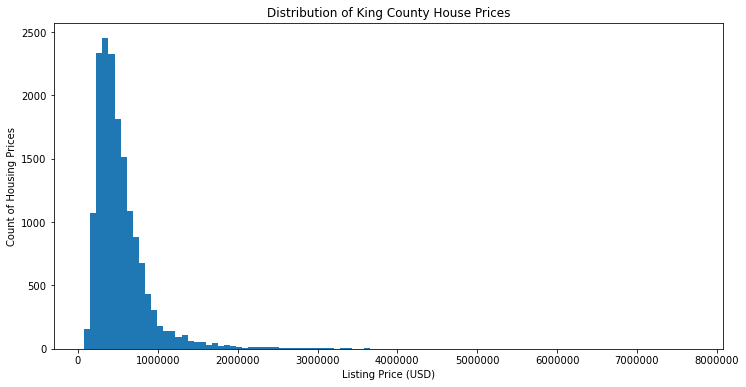

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(y_train, bins=100)
ax.ticklabel_format(useOffset=False, style='plain')

ax.set_xlabel("Listing Price (USD)")
ax.set_ylabel("Count of Housing Prices")
ax.set_title("Distribution of King County House Prices");

As we can see, and as to be expected, our data is skewed right.

Next, we are going to try to see which one of our numeric columns correlates the most with price using a correlation matrix.

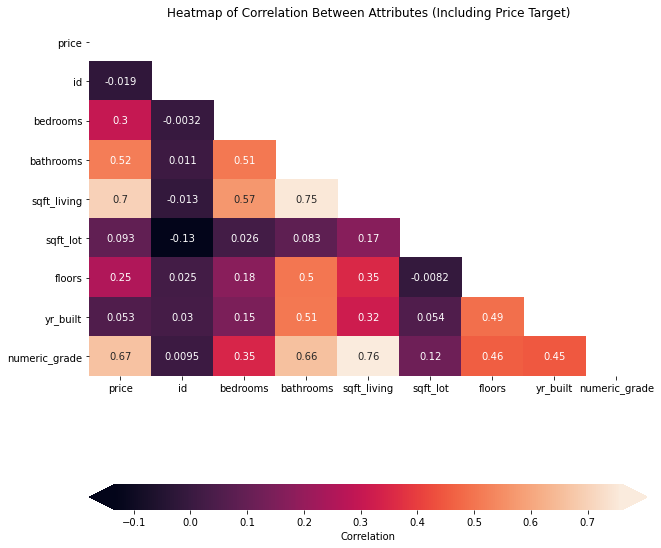

In [14]:
# Create a df with the target as the first column, then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Plot a heatmap of the correlation matrix, with both numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Price Target)");

Based on the plot above, the feature that is most strongly correlated with the target (price) is the square footage of the living space in the home (sqft_living). Let's create a scatter plot of that feature vs. the listing price.

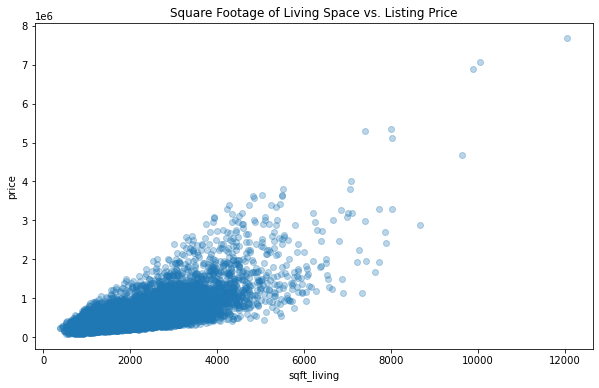

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(X_train['sqft_living'], y_train, alpha=0.3)
ax.set_xlabel('sqft_living')
ax.set_ylabel("price")
ax.set_title("Square Footage of Living Space vs. Listing Price");

Not surprisingly, there appears to be a fairly clear linear relationship between the square footage feature and price of a home in King County. We can use this to make a baseline model without any additional transformations.

## Baseline Model

We will build a linear regression model using just square footage to serve as our baseline model.

In [16]:
X_train = sm.add_constant(X_train)

X_train

,const,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,numeric_grade
268,1.0,2557000400,3,2.50,2070,9900,1.0,NO,Average,Good,1979,8
7140,1.0,9839300545,2,2.00,1270,5500,1.5,NO,Good,Good,1921,8
2967,1.0,8965520100,3,2.25,3440,10628,2.0,NO,Average,Very Good,1985,10
7989,1.0,1909600115,3,2.00,2330,6346,1.5,NO,Average,Low Average,1934,6
916,1.0,739980260,3,2.50,1920,5322,2.0,NO,Average,Good,1999,8
...,...,...,...,...,...,...,...,...,...,...,...,...
153,1.0,7855801670,4,3.25,5180,19850,2.0,NO,Average,Luxury,2006,12
866,1.0,3955900830,3,2.50,3460,6590,2.0,NO,Average,Average,2001,7
74,1.0,3444100400,3,1.75,1790,50529,1.0,NO,Very Good,Average,1965,7
14513,1.0,3888100133,3,1.00,1160,10988,1.0,NO,Average,Average,1965,7


In [17]:
model = sm.OLS(y_train, X_train[['const', 'sqft_living']]).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                 1.556e+04
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:50:59   Log-Likelihood:            -2.2514e+05
No. Observations:               16195   AIC:                         4.503e+05
Df Residuals:                   16193   BIC:                         4.503e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.794e+04   5150.119     -9.309      0.000    -5.8e+04   -3.79e+04
sqft_living   282.9719      2.268    124.753      0.000     278.526     287.418
==============================================================================
Omnibus:                    11417.926   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           456055.393
Skew:                           2.911   Prob(JB):                         0.00
Kurtosis:                      28.337   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

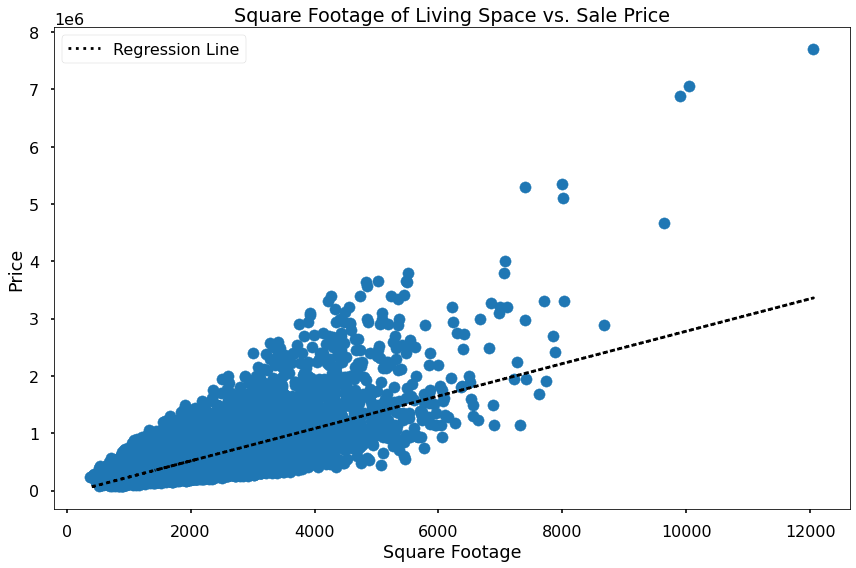

In [19]:
y_pred = model.predict(X_train[['const', 'sqft_living']])

with plt.style.context('seaborn-poster'):
    fig, ax = plt.subplots(figsize=(12,8))

    ax.plot(X_train['sqft_living'], 
            y_pred, 
            color='black', 
            ls=':',
            label='Regression Line'
            )
    ax.scatter(
        X_train['sqft_living'], 
        y_train, 
        color='tab:blue'
        )
    
    ax.set(xlabel='Square Footage', ylabel='Price', title='Square Footage of Living Space vs. Sale Price')
    ax.legend()
    fig.tight_layout()

## R-squared

The key number to look at above is the R-squared value, which is 0.490. This is the percentage of variation explained by the relationship between the dependent variable (in this case the square footage) and the independent variable (price). This means that our model explains 49% of the variation in the data.

In [20]:
# View model coefficients
model.params

const         -47944.987107
sqft_living      282.971916
dtype: float64

In [21]:
baseline_model = LinearRegression()

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=21)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[['sqft_living']],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4874154624433573
Validation score: 0.49570647362567843


Since we are using cross_validate, it defaults to the .score method of the estimator by default, which are r-squared scores. That means that the train score and the validation score represent the amount of variance of the target (price) that is explained by the model's features (currently just the square footage) and parameters (intercept value and coefficient values for the features).

## Build a Model with All Numeric Features

Now that we have a baseline, let's create a more complex model. We are going to use all of the numeric features available to see how this new model performs.

In [22]:
X_train_numeric = X_train.select_dtypes(include='number')

X_train_numeric

,const,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,numeric_grade
268,1.0,2557000400,3,2.50,2070,9900,1.0,1979,8
7140,1.0,9839300545,2,2.00,1270,5500,1.5,1921,8
2967,1.0,8965520100,3,2.25,3440,10628,2.0,1985,10
7989,1.0,1909600115,3,2.00,2330,6346,1.5,1934,6
916,1.0,739980260,3,2.50,1920,5322,2.0,1999,8
...,...,...,...,...,...,...,...,...,...
153,1.0,7855801670,4,3.25,5180,19850,2.0,2006,12
866,1.0,3955900830,3,2.50,3460,6590,2.0,2001,7
74,1.0,3444100400,3,1.75,1790,50529,1.0,1965,7
14513,1.0,3888100133,3,1.00,1160,10988,1.0,1965,7


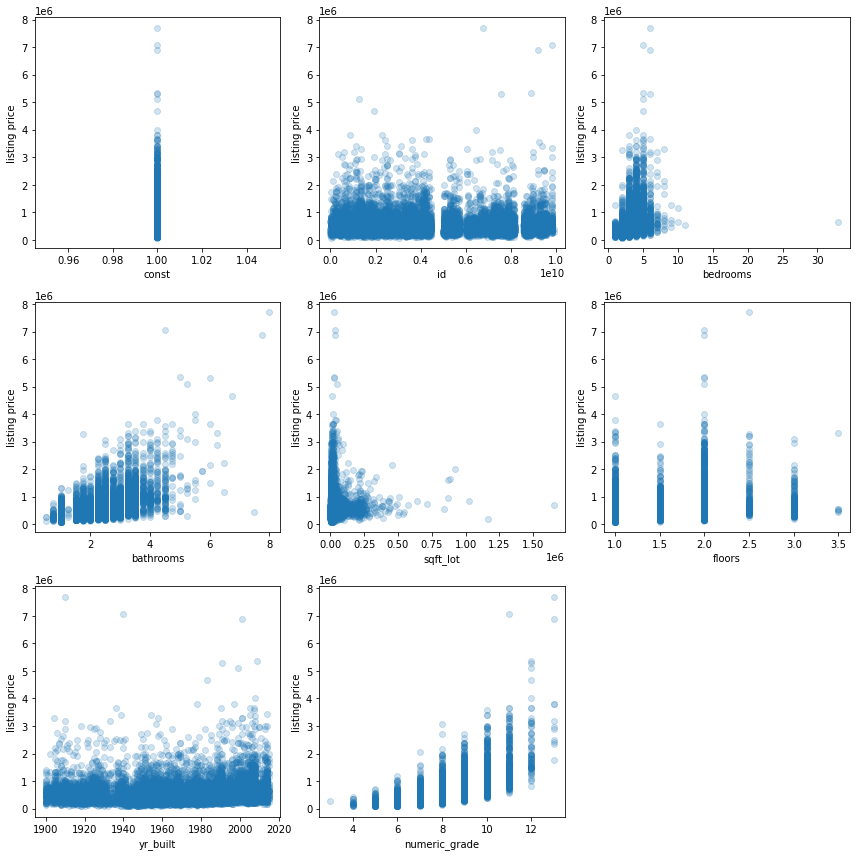

In [23]:
scatterplot_data = X_train_numeric.drop("sqft_living", axis=1)

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 12))
fig.set_tight_layout(True)
fig.delaxes(axes[2][2])

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train_numeric[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")

## Feature Selection Using Domain Understanding

We have a column (id) that is a unique identifier, not an actual numeric feature, so we will have to drop that when creating our second model.

In [24]:
X_train_second_model = X_train_numeric.drop(labels=['id'], axis=1)

X_train_second_model

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,numeric_grade
268,1.0,3,2.50,2070,9900,1.0,1979,8
7140,1.0,2,2.00,1270,5500,1.5,1921,8
2967,1.0,3,2.25,3440,10628,2.0,1985,10
7989,1.0,3,2.00,2330,6346,1.5,1934,6
916,1.0,3,2.50,1920,5322,2.0,1999,8
...,...,...,...,...,...,...,...,...
153,1.0,4,3.25,5180,19850,2.0,2006,12
866,1.0,3,2.50,3460,6590,2.0,2001,7
74,1.0,3,1.75,1790,50529,1.0,1965,7
14513,1.0,3,1.00,1160,10988,1.0,1965,7


## Build and Evaluate the Second Model

In [25]:
model = sm.OLS(y_train, X_train_second_model).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     3683.
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:51:01   Log-Likelihood:            -2.2287e+05
No. Observations:               16195   AIC:                         4.458e+05
Df Residuals:                   16187   BIC:                         4.458e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.383e+06   1.47e+05     50.183      0.000    7.09e+06    7.67e+06
bedrooms      -4.845e+04   2437.812    -19.876      0.000   -5.32e+04   -4.37e+04
bathrooms      5.116e+04   4187.783     12.215      0.000    4.29e+04    5.94e+04
sqft_living     190.7151      3.986     47.852      0.000     182.903     198.527
sqft_lot         -0.2379      0.045     -5.291      0.000      -0.326      -0.150
floors         1.718e+04   4149.487      4.140      0.000    9047.365    2.53e+04
yr_built      -4170.6027     77.542    -53.785      0.000   -4322.593   -4018.612
numeric_grade  1.325e+05   2607.354     50.809      0.000    1.27e+05    1.38e+05
==============================================================================
Omnibus:                    13329.519   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1011058.924
Skew:                           3.472   Prob(JB):                         0.00
Kurtosis:                      41.080   Cond. No.                     3.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6133514178426851
Validation score: 0.6157261337430056

Baseline Model
Train score:      0.4874154624433573
Validation score: 0.49570647362567843


As we can see, we improved pretty significantly from our first model (0.49 to 0.614 r-squared). Additionally, our validation score is in line with our train score, which shows that we are not overfitting our data.

## Create a Third Model: Add in Categorical Variables

We still are not using all of the data we have available to us. Now, let's look to improve our model even more by adding in the categorical features.

In [27]:
X_train_cat = X_train.select_dtypes(include='object')

X_train_cat

,waterfront,condition,grade
268,NO,Average,Good
7140,NO,Good,Good
2967,NO,Average,Very Good
7989,NO,Average,Low Average
916,NO,Average,Good
...,...,...,...
153,NO,Average,Luxury
866,NO,Average,Average
74,NO,Very Good,Average
14513,NO,Average,Average


In [28]:
# Need to drop "grade" since we already broke out the numeric portion of it

X_train_cat = X_train_cat.drop("grade", axis=1)

X_train_cat

,waterfront,condition
268,NO,Average
7140,NO,Good
2967,NO,Average
7989,NO,Average
916,NO,Average
...,...,...
153,NO,Average
866,NO,Average
74,NO,Very Good
14513,NO,Average


In [29]:
# Use get_dummies() for categorical variables.

condition_cols = pd.get_dummies(X_train_cat['condition'], prefix='cond', drop_first=True)
water_cols = pd.get_dummies(X_train_cat['waterfront'], prefix='water', drop_first=True)

Next, let's remove the original columns from our data and add the dummy columns instead

In [30]:
X_train_third_model = X_train_cat.drop(['condition', 'waterfront'], axis=1)

In [31]:
X_train_third_model = pd.concat([X_train_second_model, X_train_third_model, condition_cols, water_cols], axis=1)
X_train_third_model

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,numeric_grade,cond_Fair,cond_Good,cond_Poor,cond_Very Good,water_YES
268,1.0,3,2.50,2070,9900,1.0,1979,8,0,0,0,0,0
7140,1.0,2,2.00,1270,5500,1.5,1921,8,0,1,0,0,0
2967,1.0,3,2.25,3440,10628,2.0,1985,10,0,0,0,0,0
7989,1.0,3,2.00,2330,6346,1.5,1934,6,0,0,0,0,0
916,1.0,3,2.50,1920,5322,2.0,1999,8,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1.0,4,3.25,5180,19850,2.0,2006,12,0,0,0,0,0
866,1.0,3,2.50,3460,6590,2.0,2001,7,0,0,0,0,0
74,1.0,3,1.75,1790,50529,1.0,1965,7,0,0,0,1,0
14513,1.0,3,1.00,1160,10988,1.0,1965,7,0,0,0,0,0


In [32]:
model = sm.OLS(y_train, X_train_third_model).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     2443.
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:51:01   Log-Likelihood:            -2.2222e+05
No. Observations:               16195   AIC:                         4.445e+05
Df Residuals:                   16182   BIC:                         4.446e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6.724e+06    1.5e+05     44.936      0.000    6.43e+06    7.02e+06
bedrooms       -4.231e+04   2351.388    -17.995      0.000   -4.69e+04   -3.77e+04
bathrooms       4.644e+04   4040.380     11.494      0.000    3.85e+04    5.44e+04
sqft_living      179.8016      3.842     46.804      0.000     172.272     187.332
sqft_lot          -0.2277      0.043     -5.263      0.000      -0.313      -0.143
floors          2.153e+04   4043.059      5.326      0.000    1.36e+04    2.95e+04
yr_built       -3835.3194     78.271    -49.000      0.000   -3988.740   -3681.899
numeric_grade   1.313e+05   2509.741     52.302      0.000    1.26e+05    1.36e+05
cond_Fair      -2697.8739   1.97e+04     -0.137      0.891   -4.13e+04    3.59e+04
cond_Good       1.347e+04   4309.815      3.125      0.002    5019.799    2.19e+04
cond_Poor       1.233e+04   4.43e+04      0.278      0.781   -7.45e+04    9.91e+04
cond_Very Good  5.165e+04   6923.408      7.460      0.000    3.81e+04    6.52e+04
water_YES         7.8e+05   2.15e+04     36.225      0.000    7.38e+05    8.22e+05
==============================================================================
Omnibus:                    12274.129   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           872563.913
Skew:                           3.051   Prob(JB):                         0.00
Kurtosis:                      38.438   Cond. No.                     3.78e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
third_model = LinearRegression()

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6437664897137544
Validation score: 0.6444749028013744

Second Model
Train score:      0.6133514178426851
Validation score: 0.6157261337430056

Baseline Model
Train score:      0.4874154624433573
Validation score: 0.49570647362567843


We can see that by adding in the categorical variables, our r-squared score improved from .614 to .644.

## Select the Best Combination of Features

Now that we have added in all of the information to our third model, we should start removing coefficients that have lower t-values to simplify our model.

In [34]:
X_train_four = X_train_third_model.drop(['cond_Poor', 'cond_Fair', 'cond_Good', 'floors', 
                                          'sqft_lot', 'cond_Very Good'], axis=1)

X_train_four

,const,bedrooms,bathrooms,sqft_living,yr_built,numeric_grade,water_YES
268,1.0,3,2.50,2070,1979,8,0
7140,1.0,2,2.00,1270,1921,8,0
2967,1.0,3,2.25,3440,1985,10,0
7989,1.0,3,2.00,2330,1934,6,0
916,1.0,3,2.50,1920,1999,8,0
...,...,...,...,...,...,...,...
153,1.0,4,3.25,5180,2006,12,0
866,1.0,3,2.50,3460,2001,7,0
74,1.0,3,1.75,1790,1965,7,0
14513,1.0,3,1.00,1160,1965,7,0


In [35]:
model = sm.OLS(y_train, X_train_four).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     4837.
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:51:01   Log-Likelihood:            -2.2227e+05
No. Observations:               16195   AIC:                         4.446e+05
Df Residuals:                   16188   BIC:                         4.446e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.917e+06   1.37e+05     50.391      0.000    6.65e+06    7.19e+06
bedrooms      -4.107e+04   2346.821    -17.502      0.000   -4.57e+04   -3.65e+04
bathrooms       5.47e+04   3915.567     13.970      0.000     4.7e+04    6.24e+04
sqft_living     174.7876      3.785     46.176      0.000     167.368     182.207
yr_built      -3928.5871     72.317    -54.325      0.000   -4070.336   -3786.838
numeric_grade  1.333e+05   2472.087     53.902      0.000    1.28e+05    1.38e+05
water_YES      7.795e+05   2.16e+04     36.096      0.000    7.37e+05    8.22e+05
==============================================================================
Omnibus:                    12155.538   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           843924.497
Skew:                           3.011   Prob(JB):                         0.00
Kurtosis:                      37.848   Cond. No.                     2.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
X_train_four

,const,bedrooms,bathrooms,sqft_living,yr_built,numeric_grade,water_YES
268,1.0,3,2.50,2070,1979,8,0
7140,1.0,2,2.00,1270,1921,8,0
2967,1.0,3,2.25,3440,1985,10,0
7989,1.0,3,2.00,2330,1934,6,0
916,1.0,3,2.50,1920,1999,8,0
...,...,...,...,...,...,...,...
153,1.0,4,3.25,5180,2006,12,0
866,1.0,3,2.50,3460,2001,7,0
74,1.0,3,1.75,1790,1965,7,0
14513,1.0,3,1.00,1160,1965,7,0


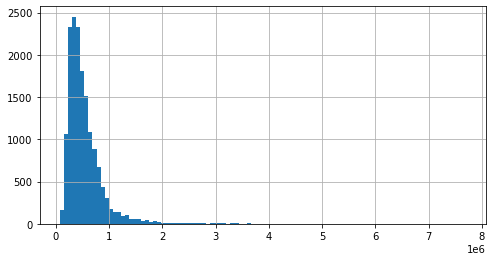

In [37]:
y_train.hist(figsize=[8,4], bins=100);

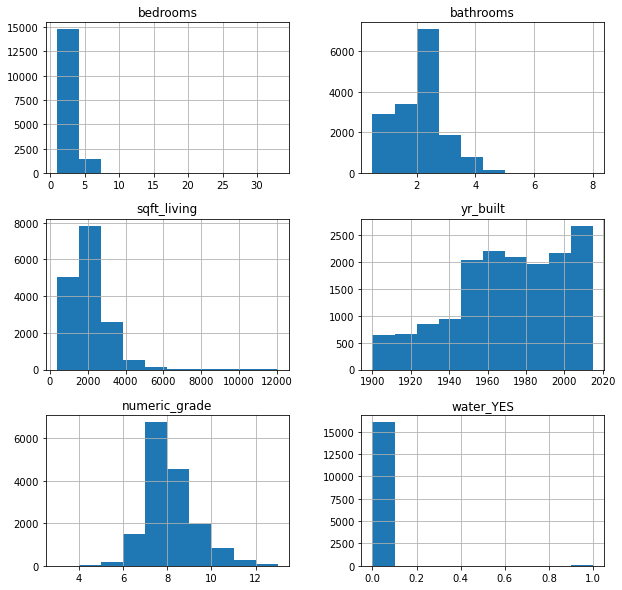

In [38]:
X_train_four[['bedrooms', 'bathrooms', 'sqft_living', 'yr_built', 'numeric_grade', 'water_YES']].hist(figsize=[10,10]);

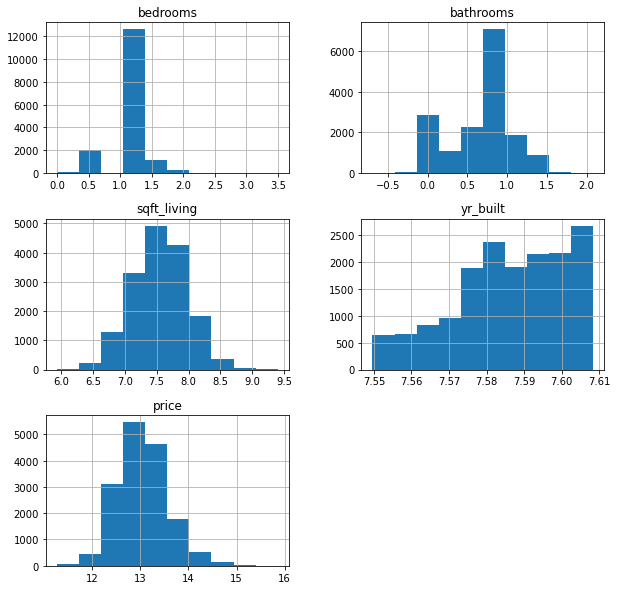

In [39]:
data_log = pd.DataFrame([])
data_log['bedrooms'] = np.log(X_train_four['bedrooms'])
data_log['bathrooms'] = np.log(X_train_four['bathrooms'])
data_log['sqft_living'] = np.log(X_train_four['sqft_living'])
data_log['yr_built'] = np.log(X_train_four['yr_built'])
data_log['price'] = np.log(y_train)
data_log.hist(figsize=[10,10]);

We can see that this helped normalize bedrooms, bathrooms, sqft_living, and sale price but it did not help normalize yr_built.

In [40]:
data_log = data_log.drop('yr_built', axis = 1)
data_log

,bedrooms,bathrooms,sqft_living,price
268,1.098612,0.916291,7.635304,12.515394
7140,0.693147,0.693147,7.146772,13.312984
2967,1.098612,0.810930,8.143227,13.658857
7989,1.098612,0.693147,7.753624,12.948010
916,1.098612,0.916291,7.560080,12.688499
...,...,...,...,...
153,1.386294,1.178655,8.552560,14.626441
866,1.098612,0.916291,8.149024,13.054085
74,1.098612,0.559616,7.489971,12.762827
14513,1.098612,0.000000,7.056175,12.793859


In [41]:
X_train_four

,const,bedrooms,bathrooms,sqft_living,yr_built,numeric_grade,water_YES
268,1.0,3,2.50,2070,1979,8,0
7140,1.0,2,2.00,1270,1921,8,0
2967,1.0,3,2.25,3440,1985,10,0
7989,1.0,3,2.00,2330,1934,6,0
916,1.0,3,2.50,1920,1999,8,0
...,...,...,...,...,...,...,...
153,1.0,4,3.25,5180,2006,12,0
866,1.0,3,2.50,3460,2001,7,0
74,1.0,3,1.75,1790,1965,7,0
14513,1.0,3,1.00,1160,1965,7,0


In [42]:
features_final = pd.concat([X_train_four[['const', 'yr_built', 'numeric_grade', 'water_YES']], data_log], axis=1)
features_final

,const,yr_built,numeric_grade,water_YES,bedrooms,bathrooms,sqft_living,price
268,1.0,1979,8,0,1.098612,0.916291,7.635304,12.515394
7140,1.0,1921,8,0,0.693147,0.693147,7.146772,13.312984
2967,1.0,1985,10,0,1.098612,0.810930,8.143227,13.658857
7989,1.0,1934,6,0,1.098612,0.693147,7.753624,12.948010
916,1.0,1999,8,0,1.098612,0.916291,7.560080,12.688499
...,...,...,...,...,...,...,...,...
153,1.0,2006,12,0,1.386294,1.178655,8.552560,14.626441
866,1.0,2001,7,0,1.098612,0.916291,8.149024,13.054085
74,1.0,1965,7,0,1.098612,0.559616,7.489971,12.762827
14513,1.0,1965,7,0,1.098612,0.000000,7.056175,12.793859


In [43]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

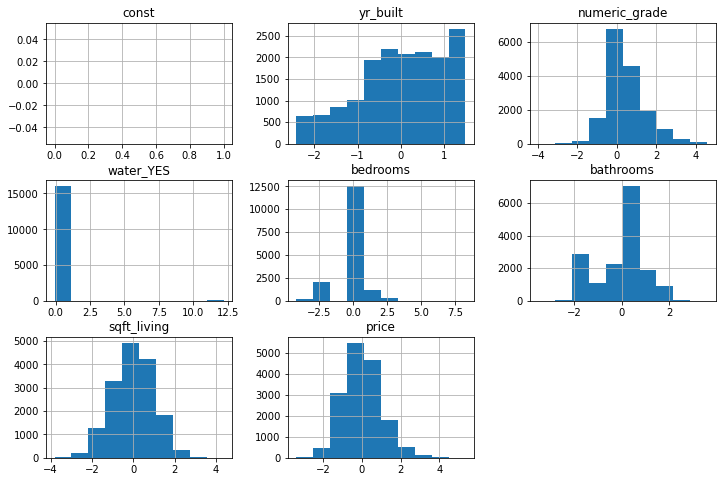

In [44]:
features_final = features_final.apply(normalize)

features_final.hist(figsize  = [12, 8]);

In [45]:
features_final

,const,yr_built,numeric_grade,water_YES,bedrooms,bathrooms,sqft_living,price
268,NaN,0.272740,0.292340,-0.081933,-0.284414,0.608146,0.200462,-1.014987
7140,NaN,-1.701519,0.292340,-0.081933,-1.724342,0.037295,-0.956366,0.503654
2967,NaN,0.476974,2.002758,-0.081933,-0.284414,0.338610,1.403209,1.162208
7989,NaN,-1.259012,-1.418079,-0.081933,-0.284414,0.037295,0.480640,-0.191270
916,NaN,0.953519,0.292340,-0.081933,-0.284414,0.608146,0.022336,-0.685389
...,...,...,...,...,...,...,...,...
153,NaN,1.191792,3.713177,-0.081933,0.737230,1.279331,2.372499,3.004524
866,NaN,1.021597,-0.562870,-0.081933,-0.284414,0.608146,1.416936,0.010700
74,NaN,-0.203805,-0.562870,-0.081933,-0.284414,-0.304307,-0.143682,-0.543865
14513,NaN,-0.203805,-0.562870,-0.081933,-0.284414,-1.735928,-1.170897,-0.484778


In [46]:
final_X_train = features_final.drop(['price', 'const'], axis=1)
final_y_train = features_final['price']
final_y_train

268     -1.014987
7140     0.503654
2967     1.162208
7989    -0.191270
916     -0.685389
           ...   
153      3.004524
866      0.010700
74      -0.543865
14513   -0.484778
338     -1.068126
Name: price, Length: 16195, dtype: float64

In [47]:
final_X_train = sm.add_constant(final_X_train)

final_X_train

,const,yr_built,numeric_grade,water_YES,bedrooms,bathrooms,sqft_living
268,1.0,0.272740,0.292340,-0.081933,-0.284414,0.608146,0.200462
7140,1.0,-1.701519,0.292340,-0.081933,-1.724342,0.037295,-0.956366
2967,1.0,0.476974,2.002758,-0.081933,-0.284414,0.338610,1.403209
7989,1.0,-1.259012,-1.418079,-0.081933,-0.284414,0.037295,0.480640
916,1.0,0.953519,0.292340,-0.081933,-0.284414,0.608146,0.022336
...,...,...,...,...,...,...,...
153,1.0,1.191792,3.713177,-0.081933,0.737230,1.279331,2.372499
866,1.0,1.021597,-0.562870,-0.081933,-0.284414,0.608146,1.416936
74,1.0,-0.203805,-0.562870,-0.081933,-0.284414,-0.304307,-0.143682
14513,1.0,-0.203805,-0.562870,-0.081933,-0.284414,-1.735928,-1.170897


In [48]:
model = sm.OLS(final_y_train, final_X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     4665.
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:51:03   Log-Likelihood:                -14849.
No. Observations:               16195   AIC:                         2.971e+04
Df Residuals:                   16188   BIC:                         2.977e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.787e-15      0.005  -1.01e-12      1.000      -0.009       0.009
yr_built         -0.3343      0.006    -56.942      0.000      -0.346      -0.323
numeric_grade     0.5511      0.008     72.576      0.000       0.536       0.566
water_YES         0.0813      0.005     16.928      0.000       0.072       0.091
bedrooms         -0.0904      0.006    -14.126      0.000      -0.103      -0.078
bathrooms         0.1289      0.008     15.638      0.000       0.113       0.145
sqft_living       0.3318      0.010     33.758      0.000       0.313       0.351
==============================================================================
Omnibus:                       37.019   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.028
Skew:                          -0.067   Prob(JB):                     7.48e-10
Kurtosis:                       3.210   Cond. No.                         4.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Although our r-squared score slightly decreased, we are now following the assumptions for linear regression.

In [49]:
# return predicted values from model
y_pred = model.fittedvalues

# # view predicted values
y_pred

268      0.233898
7140     0.566738
2967     1.472603
7989    -0.177214
916     -0.052822
           ...   
153      2.526743
866     -0.084117
74      -0.309907
14513   -0.835320
338     -0.366674
Length: 16195, dtype: float64

In [50]:
# true y value
y = final_y_train

# return mean absolute error of model
mae_resid = np.mean(np.abs(y - y_pred))

# view residuals from model
mae_resid

0.4818447034942985

The MAE informs us that on average, our model has an error of $142,857 USD when predicting the price of a home in King County.

## Assumptions of Linear Regression

At this point, it is important to keep the assumptions of linear regression in mind as model our data. If these assumption are not met, we can not be confident in the accuracy of our model. The assumptions we will explore in this notebook are:

* Linearity: there is a linear relationship between the independent and dependent variables
* Multicollinearity: independent variables are not highly correlated
* Normality: residuals are normally distributed
* Homoscedasticity: the variance for the residual is the same for any value of x

## Linearity

Pairplots are useful tools to check for linearity between the dependent and independent variables.

* Ask yourself "What pattern do I see?". If a straight line appears to fit the data well, this is a great sign* that there is a linear relationship between the independent and dependent variables.

In [51]:
heatmap_data = pd.concat([final_y_train, final_X_train], axis=1)

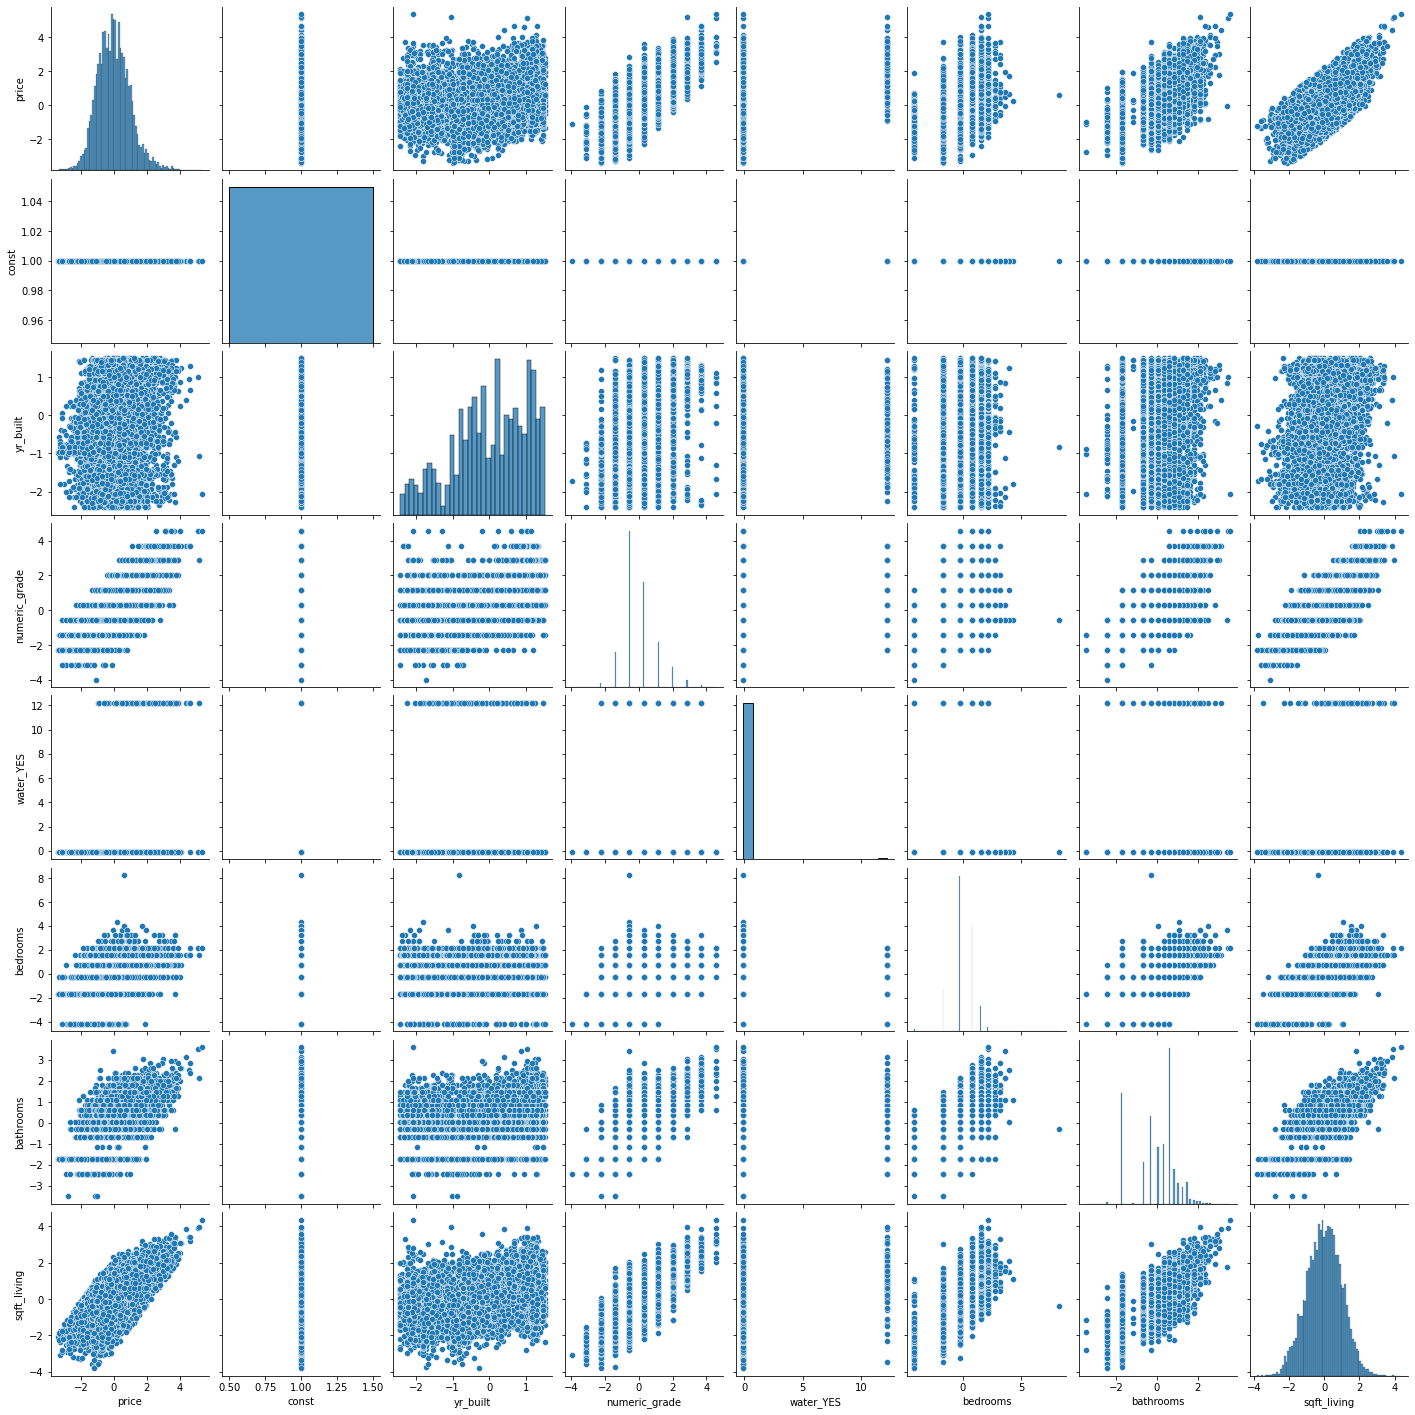

In [52]:
# view scatter plots and distribution plots for variables
sns.pairplot(heatmap_data);

It appears that our data can follow a straight line when comparing to price.

## Multicollinearity

On our final model, our condition number is 4.5, which is generally good because ideally we would like to see a condition number below 30.

In [53]:
# Writing a function to create VIF dictionary.
def create_vif_dictionary(X):
    """
    Parameters
    ----------
    X: Pandas dataframe of predictive variables only.
        Should have `.columns` and `.values` attributes.
    """
    
    vif_dct = {}

    # Loop through each row and set the variable name to the VIF. 
    for i in range(len(X.columns)):
        # Calculate VIF
        vif = variance_inflation_factor(X.values, i)
        
        # Extract column name for dictionary key.
        v = X.columns[i]
        
        # Set value in dictionary.
        vif_dct[v] = vif

    return vif_dct

In [54]:
pd.DataFrame(create_vif_dictionary(final_X_train), index=[0]).T

,0
const,1.000000
yr_built,1.523100
numeric_grade,2.547491
water_YES,1.019711
bedrooms,1.811165
bathrooms,3.002033
sqft_living,4.268990


## Normality

The normality assumption states that the model residuals should follow a normal distribution. Note: the normality assumption talks about the model residuals and not about the distributions of the variables!

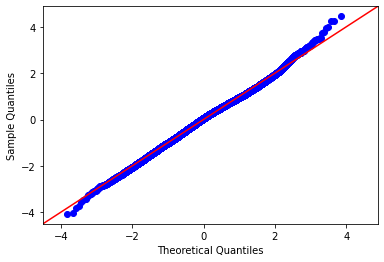

In [55]:
residuals = y - y_pred
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

Because we log transformed and standardized our data, we are now meeting the assumption of normality. Our Q-Q plot is used to help assess if a sample looks to be from a normal distribution and **since our data appears to be following the red line, we are meeting the assumption of normality.**

## Homoscedasticity

Heteroscedasticity (also spelled heteroskedasticity) refers to the circumstance in which the dependent variable is unequal across the range of values of the predictor(s).

When there is heteroscedasticity in the data, a scatterplot of these variables will often create a cone-like shape. The scatter of the dependent variable widens or narrows as the value of the independent variable increases.

The best way to check for homoscedasticity is to check the Durbin-Watson score which is a test for error homoskedasticity. **Ideally we are looking for a value between ~1.5 and ~2.5. In the case of our model, we see a score of 1.986.**